<a href="https://colab.research.google.com/github/kahakashanashraf/machine-learning/blob/main/Bangla_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re, json, nltk
from sklearn.preprocessing  import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score, classification_report
path= '/content/drive/My drive/Colab Notebooks/ adithesis'
stopwords_list = path+'bangla_stowords.text'
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# Step 2: Load the data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset.csv to Dataset.csv


In [ ]:
# Load the data into a Pandas DataFrame
data = pd.read_csv('Dataset.csv')
data.head(10)

,Sentence,Type
0,যা‌দের মন সুন্দর তা‌দের ছ‌বিও সুন্দর।\n,No
1,আল্লাহ সুবহানাহু ওয়াতাআ'লা নেক হায়াৎ দান করুন,No
2,আলহামদুলিল্লাহ ভালো সিদ্ধান্ত,No
3,আপনাকে নিচে নামানোর জন্য অনেকেই অনেক কিছু বলবে...,No
4,হিরো আলমের বউ ক্ষেপতেসো ক্যান?,Yes
5,কলকাতার হুগো মারা সারা,Yes
6,সৌন্দর্য কখনো চরিত্রের চেয়ে দামি হতে পারেনা,No
7,শুভকামনা সবসময়,No
8,হিরোইন হিসেবে সান্ডি সাহাকেই পাবেন আর সংগীত শি...,Yes
9,স্যার আপনার জন্য শুভ কামনা রইল,No


data Preparation



In [ ]:
print("Total comments:",len(data),
      "\nTotal positive comments:",len(data[data.Type =='No']),
      "\nTotal abusive comments:",len(data[data.Type=='Yes']))

Total comments: 4999 
Total positive comments: 2198 
Total abusive comments: 2798


In [ ]:
data.columns

Index(['Sentence', 'Type'], dtype='object')

In [ ]:
# print some unprocessed reviews
sample_data = [10,100,150,200,250,600,650,666,689,640,650,700,750,800,1000, 4996]
for i in sample_data:
      print(data.Sentence[i],'\n','Sentiment:-- ',data.Type[i],'\n')

শুনে খুবই ভালো লাগলো 
 Sentiment:--  No 

কুকুরদের সুন্দর লাগছে! 
 Sentiment:--  Yes 

আমি ও তো জানি যে তুই কি তুই একটা খানকি, মাগী, কালো চুদি  
 Sentiment:--  Yes 

এরে পুটিমাছ নাস্তিক 
 Sentiment:--  Yes 

এই গান গুলো যারা শুনে তারা ও এক ধরনের বিশেষ মানুষ 
 Sentiment:--  No 

আমার বাবা বেঁচে আছে আলহামদুলিল্লাহ ,,,কিন্তু বাবাকে অনেক অপমান করেছি, মুখের ওপর কথা বলেছি, অনেক বড় কথাও বলেছি যদিও আমার বাবা রোদে, বৃষ্টিতে, শীতে সব সময়ই আমাদের জন্য অর্থ এনে দিয়েছে,,,,আমার ইচ্ছা পূরন করেছে 
 Sentiment:--  No 

বাবাকে কোনদিন দেখি নি আমার জন্মের পর বাবা মরা যায় তোমাকে খুব মিস করি বাবা 
 Sentiment:--  No 

বাবা কত দিন হয়ে গেল দেখি না তোমায়!!আর কখনো হবেও না!! 
 Sentiment:--  No 

আমি ক্লাস ৩ তৃতীয় শেণি থাকতে বাবা হারিয়ে ছি পুরাই জীবন টা এলেমেলো হয়ে গেছে 
 Sentiment:--  No 

সেলুট জানাই পৃথিবীর সকল বাবাকে  
 Sentiment:--  No 

বাবাকে কোনদিন দেখি নি আমার জন্মের পর বাবা মরা যায় তোমাকে খুব মিস করি বাবা 
 Sentiment:--  No 

বাবা অমুল্য রতন থাকতে বুঝিনায়। 
 Sentiment:--  No 

আমরা বন্ধুরা ট্যুরে গেলে গান

duplicate and null check

In [ ]:
data.drop_duplicates(inplace= True)
data['Type']. value_counts()

Yes    2788
No     2198
Name: Type, dtype: int64

In [ ]:
null_counts =data.isnull().sum()
data.dropna(subset=['Sentence'], inplace=True)
# Verify that null values have been dropped
null_counts_after_drop = data.isnull().sum()

# Display the null counts before and after dropping null values
print("Null Counts Before Dropping:")
print(null_counts)
print("\nNull Counts After Dropping:")
print(null_counts_after_drop)


Null Counts Before Dropping:
Sentence    0
Type        3
dtype: int64

Null Counts After Dropping:
Sentence    0
Type        3
dtype: int64


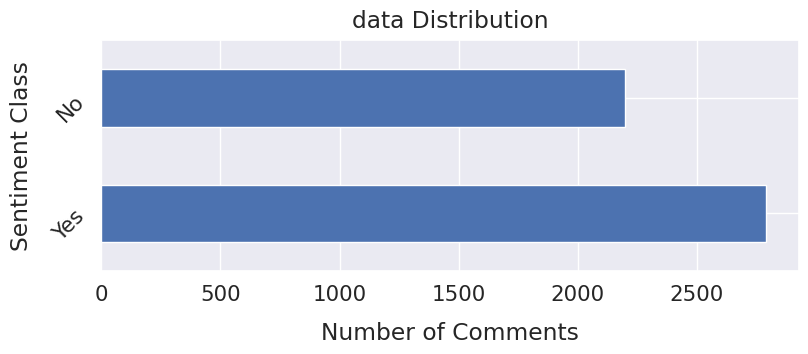

In [ ]:
sns.set(font_scale=1.4)
data['Type'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Comments", labelpad=12)
plt.ylabel("Sentiment Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("data Distribution", y=1.02);

<Axes: ylabel='Type'>

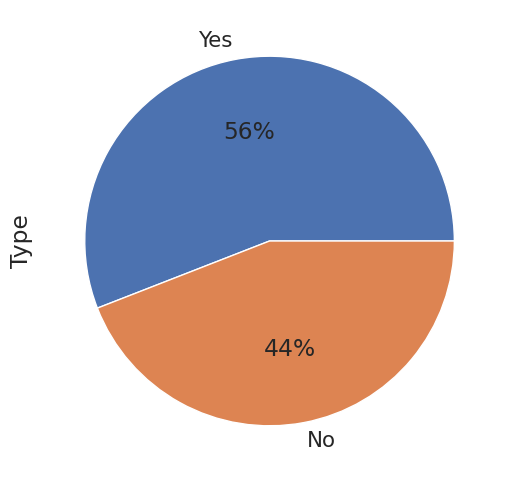

In [ ]:
plt.rcParams["figure.figsize"]= [7,6]
data['Type'].value_counts().plot(kind= 'pie',autopct = '%1.0f%%')

Data Cleaning

In [ ]:
def process_comments(Text):
    comment = re.sub('[^\u0980-\u09FF]',' ',str(Text)) #removing unnecessary punctuation
    return comment
def process_comments1(Text):
    comment = re.sub('[০-৯]',' ',str(Text))
    return comment

In [ ]:
# Apply the function into the dataframe
data['cleaned'] = data['Sentence'].apply(process_comments)

# print some cleaned reviews from the data
sample_data = [10,100,25,854,966,1500,1589,1700,2000,2500,4000,4500]
for i in sample_data:
     print('Original:\n',data.Sentence[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Sentiment:-- ',data.Type[i],'\n')

Original:
 শুনে খুবই ভালো লাগলো 
Cleaned:
 শুনে খুবই ভালো লাগলো 
 Sentiment:--  No 

Original:
 কুকুরদের সুন্দর লাগছে! 
Cleaned:
 কুকুরদের সুন্দর লাগছে  
 Sentiment:--  Yes 

Original:
 বাশ ভরে দিব পিচনে 
Cleaned:
 বাশ ভরে দিব পিচনে 
 Sentiment:--  Yes 

Original:
 তোর নাকে হাইগ্যা দিমু 
Cleaned:
 তোর নাকে হাইগ্যা দিমু 
 Sentiment:--  Yes 

Original:
 রেন্ডিয়া কে নিশ্চিহ্ন করে দে 
Cleaned:
 রেন্ডিয়া কে নিশ্চিহ্ন করে দে 
 Sentiment:--  Yes 

Original:
 এইটা বুযতে হবে জাতিতে এই সব কাউয়া কাদিরার সাজানো নাটক 
Cleaned:
 এইটা বুযতে হবে জাতিতে এই সব কাউয়া কাদিরার সাজানো নাটক 
 Sentiment:--  Yes 

Original:
 আমরা অতীত ভুলে যাই  সাল বাংলার মানুষ জিবন বাচানোর জন্য ভারতে আশ্রয় নিলো আজ রুহিঙ্গা মুসলিমরা যখন আমাদের কাছে আশ্রয় চায় আমারা তাদের ফিরিয়ে দেই আমারা বড়ই স্বার্থপর জাতি 
Cleaned:
 আমরা অতীত ভুলে যাই  সাল বাংলার মানুষ জিবন বাচানোর জন্য ভারতে আশ্রয় নিলো আজ রুহিঙ্গা মুসলিমরা যখন আমাদের কাছে আশ্রয় চায় আমারা তাদের ফিরিয়ে দেই আমারা বড়ই স্বার্থপর জাতি 
 Sentiment:--  Yes 

Original:
 আপনার ইচ্ছে পূ

data Summary

In [ ]:
def data_summary(data):

    """
    This function will print the summary of the reviews and words distribution in the data.

    Args:
        data: list of cleaned sentences

    Returns:
        Number of documnets per class: int
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(data.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in data.Type.value_counts().to_dict().items()]
  # find word list
    for label in class_label:
        word_list = [word.strip().lower() for t in list(data[data.Type==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(data[data.Type==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(data[data.Type==label].cleaned))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(data)


Class Name :  Yes
Number of Documents:2788
Number of Words:28450
Number of Unique Words:7690
Most Frequent Words:

না	428
এই	276
আর	264
করে	259
কি	220
ভারত	217
ভারতের	197
তো	155
তোর	153
খানকির	147

Class Name :  No
Number of Documents:2198
Number of Words:29700
Number of Unique Words:5797
Most Frequent Words:

অনেক	553
ভালো	358
এই	344
জন্য	330
আমার	310
আপনার	296
না	277
ধন্যবাদ	244
ভাই	241
আমি	233
Total Number of Unique Words:11490


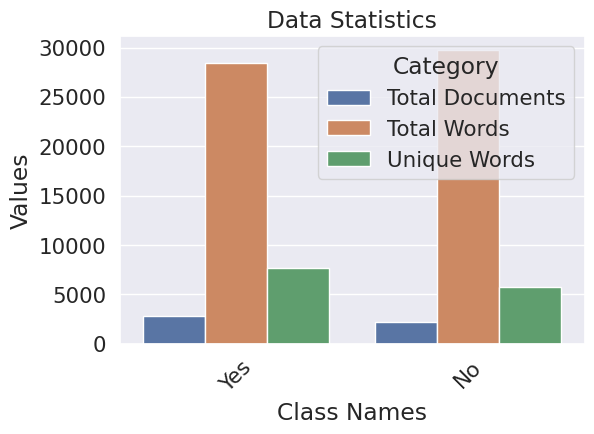

In [ ]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(6, 4))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names')
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

Comment Lenght Distribution

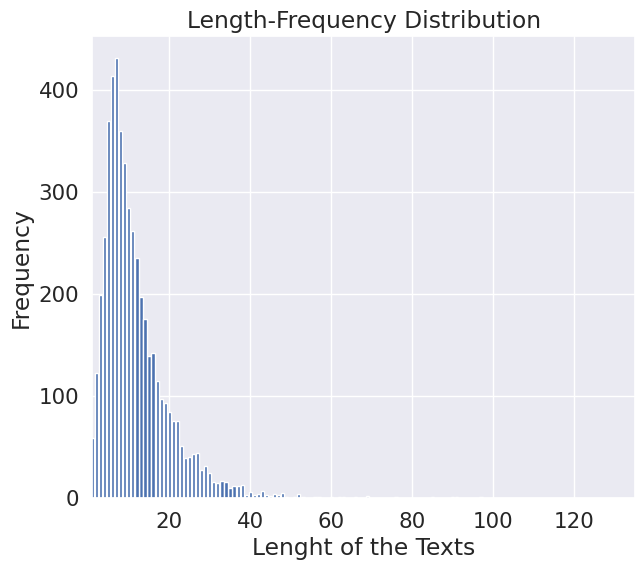

Maximum Length of a review: 97
Minimum Length of a review: 1
Average Length of a reviews: 12.0


In [ ]:
# Calculate the Review of each of the Review
data['ReviewLength'] = data.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in data.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()
print(f"Maximum Length of a review: {max(data.ReviewLength)}")
print(f"Minimum Length of a review: {min(data.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(data.ReviewLength),0)}")

Tokenization

In [ ]:
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
data["Tokenized_Word"]=data.apply(lambda row: nltk.word_tokenize(row['cleaned']), axis=1)

data.head(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Sentence,Type,cleaned,ReviewLength,Tokenized_Word
0,যা‌দের মন সুন্দর তা‌দের ছ‌বিও সুন্দর।\n,No,যা দের মন সুন্দর তা দের ছ বিও সুন্দর,9,"[যা, দের, মন, সুন্দর, তা, দের, ছ, বিও, সুন্দর]"
1,আল্লাহ সুবহানাহু ওয়াতাআ'লা নেক হায়াৎ দান করুন,No,আল্লাহ সুবহানাহু ওয়াতাআ লা নেক হায়াৎ দান করুন,8,"[আল্লাহ, সুবহানাহু, ওয়াতাআ, লা, নেক, হায়াৎ, দা..."
2,আলহামদুলিল্লাহ ভালো সিদ্ধান্ত,No,আলহামদুলিল্লাহ ভালো সিদ্ধান্ত,3,"[আলহামদুলিল্লাহ, ভালো, সিদ্ধান্ত]"
3,আপনাকে নিচে নামানোর জন্য অনেকেই অনেক কিছু বলবে...,No,আপনাকে নিচে নামানোর জন্য অনেকেই অনেক কিছু বলবে...,17,"[আপনাকে, নিচে, নামানোর, জন্য, অনেকেই, অনেক, কি..."
4,হিরো আলমের বউ ক্ষেপতেসো ক্যান?,Yes,হিরো আলমের বউ ক্ষেপতেসো ক্যান,5,"[হিরো, আলমের, বউ, ক্ষেপতেসো, ক্যান]"
5,কলকাতার হুগো মারা সারা,Yes,কলকাতার হুগো মারা সারা,4,"[কলকাতার, হুগো, মারা, সারা]"
6,সৌন্দর্য কখনো চরিত্রের চেয়ে দামি হতে পারেনা,No,সৌন্দর্য কখনো চরিত্রের চেয়ে দামি হতে পারেনা,7,"[সৌন্দর্য, কখনো, চরিত্রের, চেয়ে, দামি, হতে, প..."
7,শুভকামনা সবসময়,No,শুভকামনা সবসময়,2,"[শুভকামনা, সবসময়]"
8,হিরোইন হিসেবে সান্ডি সাহাকেই পাবেন আর সংগীত শি...,Yes,হিরোইন হিসেবে সান্ডি সাহাকেই পাবেন আর সংগীত শি...,13,"[হিরোইন, হিসেবে, সান্ডি, সাহাকেই, পাবেন, আর, স..."
9,স্যার আপনার জন্য শুভ কামনা রইল,No,স্যার আপনার জন্য শুভ কামনা রইল,6,"[স্যার, আপনার, জন্য, শুভ, কামনা, রইল]"


In [ ]:
stop_words = {'বক্তব্য', 'ছাড়াও', 'করছে', 'তার', 'এসে', 'এ', 'পারেন', 'যারা', 'দেয়', 'নেওয়ার', 'তাকে', 'মোটেই', 'করলেন', 'হল', 'ইত্যাদি', 'নিয়ে', 'বেশি',  'পরেই', 'দেওয়া',
              'দেখা', 'হয়', 'করেছে', 'তবু', 'বিনা', 'ছিল', 'খুব', 'নেই', 'কারও', 'ফিরে', 'জ্নজন', 'বার', 'চেষ্টা', 'অন্তত', 'তাঁরা', 'হবে', 'ফলে', 'সেটাও', 'আপনি','হয়েছে','অনেকে',
              'স্বয়ং', 'শুধু', 'হন', 'যাওয়া', 'হলে', 'ওদের', 'নয়', 'কেখা', 'তাঁাহারা', 'যিনি', 'থাকে', 'একই', 'কেউই', 'হতে', 'উচিত', 'হওয়া', 'এল', 'ওখানে', 'দিলেন','মধ্যে','বরং',
              'দেখতে', 'ওঁরা', 'যাতে', 'মাত্র', 'হওয়ার', 'করেছিলেন', 'এতটাই', 'হয়ে', 'বলতে', 'করিতে', 'হলো', 'সম্প্রতি', 'দেওয়ার', 'অতএব', 'ওঁদের', 'কেন', 'করলে', 'প্রভৃতি','নিজেদের',
              'দিতে', 'তিনঐ', 'অনেকেই', 'হইবে','যাওয়ার', 'এতে', 'এমনকী', 'অবধি', 'জে', 'হইতে', 'যেন', 'হয়তো','এখনও', 'মতো', 'করে', 'দ্বারা', 'গেল', 'যেখানে', 'উপরে', 'তথা',
              'জানিয়ে', 'পেয়্র্', 'তাও', 'পারে','থাকায়', 'বাদে', 'তারৈ', 'ছিলেন', 'হয়নি', 'প্রথম', 'প্রায়', 'ঠিক', 'এঁরা', 'এরা', 'কয়েক', 'কে', 'দিয়েছেন', 'বিষয়টি', 'ওই', 'ছাড়া', 'সঙ্গেও',
              'দেওয়া', 'করায়', 'থাকেন','ওঁর', 'নিয়ে', 'তাঁর', 'হাজার', 'সব', 'স্পষ্ট', 'কোন', 'বদলে', 'উত্তর', 'আর', 'আবার', 'ইহা', 'তারপর', 'আমাকে', 'পি', 'সঙ্গে', 'বিশেষ', 'নয়',
              'করতে', 'একটি', 'যাওয়া', 'অনুযায়ী', 'হলেও', 'জন', 'দুটো', 'করবে', 'কিছুই', 'চায়','যান', 'তাই', 'দিয়ে', 'যেতে', 'কবে','করবেন', 'ব্যবহার', 'সামনে', 'কিছু', 'তাহা',
              'যেমন', 'তো', 'নতুন', 'ই', 'মধ্যেই', 'বি', 'দুই','প্রায়', 'যা', 'নিজে', 'র', 'সেই', 'পারি', 'পর্যন্ত', 'এর', 'আমার','লক্ষ','দেখে','দিন', 'কাজ','রকম','তারা','যাদের','সেটা',
              'তাদের', 'গিয়েছে', 'তা', 'কিন্তু', 'পক্ষে', 'এটি','চার', 'এখানেই', 'ধরে', 'নাকি', 'সে', 'যদিও', 'কয়েকটি', 'গেছে', 'কমনে', 'মধ্যেও', 'থেকে','আমি', 'সমস্ত', 'সুতরাং', 'হলেই',
              'নাই','অবশ্য', 'যায়', 'অর্থাত', 'চালু', 'হওয়ায়', 'দুটি', 'নানা', 'নিজেই', 'নাগাদ', 'কখনও', 'বললেন', 'কাছ', 'তুলে', 'যখন', 'হৈলে', 'সহ','পরেও','বলেছেন','থেকেই','করেছেন',
              'মাধ্যমে', 'তুমি', 'মনে', 'করছেন', 'আদ্যভাগে', 'জনকে', 'যে', 'কি', 'নেওয়া', 'জানতে', 'জন্য', 'ওর', 'যত', 'সি','আমাদের', 'যাঁরা', 'এবং', 'হইয়া', 'আগামী', 'তাহলে','আজ'
              'উনি', 'বেশ', 'যাবে', 'দিয়েছে', 'হয়েছেন', 'যাঁর', 'কাছে', 'কোনো', 'আপনার', 'কত', 'মধ্যভাগে', 'কাউকে', 'থাকা', 'তত', 'রয়েছে', 'ভাবেই', 'হয়েছিল', 'থেকেও',
              'হয়', 'পর', 'ওরা', 'গেলে', 'গিয়ে', 'উপর', 'টি', 'দু', 'যার', 'মতোই', 'যথেষ্ট', 'থাকবে', 'বা', 'পেয়ে', 'বহু', 'যাচ্ছে', 'ধামার', 'হত', 'ধরা', 'প্রতি', 'তখন', 'তাহাতে',
              'জন্যওজে', 'নেওয়া', 'তাঁকে', 'ঐ', 'সেটি', 'না', 'করার', 'হচ্ছে', 'একবার', 'করা', 'চলে', 'এব', 'তিনিও', 'শুরু', 'বলা', 'বলে', 'একে', 'প্রাথমিক', 'সেটাই', 'কয়েক', 'ভাবে',
              'জানিয়েছে', 'কোনও', 'হোক', 'আগে', 'তোমার', 'দেন', 'পরে', 'এবার', 'কারণ', 'অথবা', 'কাজে', 'তাতে', 'ব্যাপারে', 'গোটা', 'হবেন', 'নিজের', 'রাখা', 'বসে', 'এদের', 'কেউ',
              'জানায়', 'রেখে', 'এস', 'এত', 'গুলি', 'তাহার', 'তেমন', 'প্রযন্ত', 'সেখান', 'এখন', 'আমরা', 'এই', 'এক্', 'হয়েই', 'হিসাবে', 'দিকে', 'তাঁদের', 'নিতে', 'থাকবেন', 'অন্য', 'হতেই',
              'সবার', 'ক্ষেত্রে', 'আরও', 'যতটা', 'বিভিন্ন', 'পাচ', 'করেই', 'অনেক', 'ওকে', 'কিংবা', 'কী', 'এটা', 'করাই', 'চেয়ে', 'জনের', 'যদি', 'ফের', 'আছে', 'এখানে', 'তিনি', 'করি',
              'গিয়ে', 'সহিত', 'বলেন', 'পাওয়া', 'করেন', 'এঁদের', 'এটাই', 'চান', 'সেখানে', 'মোট', 'করিয়ে', 'যাকে', 'এমনি', 'অথচ', 'সাধারণ', 'করিয়া', 'জানা', 'বন', 'জানানো',
              'তবে', 'আই', 'এমন', 'ও', 'বলল', 'আগেই','টা'}

def remove_stop_words(text):
    text = [w for w in text if not w in stop_words]
    text = ' '.join(text)
    return text

In [ ]:
data['Final_Text'] = [remove_stop_words(sent) for sent in data.Tokenized_Word.tolist()]
#del df['sentence']
data.head(10)

,Sentence,Type,cleaned,ReviewLength,Tokenized_Word,Final_Text
0,যা‌দের মন সুন্দর তা‌দের ছ‌বিও সুন্দর।\n,No,যা দের মন সুন্দর তা দের ছ বিও সুন্দর,9,"[যা, দের, মন, সুন্দর, তা, দের, ছ, বিও, সুন্দর]",দের মন সুন্দর দের ছ বিও সুন্দর
1,আল্লাহ সুবহানাহু ওয়াতাআ'লা নেক হায়াৎ দান করুন,No,আল্লাহ সুবহানাহু ওয়াতাআ লা নেক হায়াৎ দান করুন,8,"[আল্লাহ, সুবহানাহু, ওয়াতাআ, লা, নেক, হায়াৎ, দা...",আল্লাহ সুবহানাহু ওয়াতাআ লা নেক হায়াৎ দান করুন
2,আলহামদুলিল্লাহ ভালো সিদ্ধান্ত,No,আলহামদুলিল্লাহ ভালো সিদ্ধান্ত,3,"[আলহামদুলিল্লাহ, ভালো, সিদ্ধান্ত]",আলহামদুলিল্লাহ ভালো সিদ্ধান্ত
3,আপনাকে নিচে নামানোর জন্য অনেকেই অনেক কিছু বলবে...,No,আপনাকে নিচে নামানোর জন্য অনেকেই অনেক কিছু বলবে...,17,"[আপনাকে, নিচে, নামানোর, জন্য, অনেকেই, অনেক, কি...",আপনাকে নিচে নামানোর বলবে বাধা পেরিয়ে উপরের উঠে...
4,হিরো আলমের বউ ক্ষেপতেসো ক্যান?,Yes,হিরো আলমের বউ ক্ষেপতেসো ক্যান,5,"[হিরো, আলমের, বউ, ক্ষেপতেসো, ক্যান]",হিরো আলমের বউ ক্ষেপতেসো ক্যান
5,কলকাতার হুগো মারা সারা,Yes,কলকাতার হুগো মারা সারা,4,"[কলকাতার, হুগো, মারা, সারা]",কলকাতার হুগো মারা সারা
6,সৌন্দর্য কখনো চরিত্রের চেয়ে দামি হতে পারেনা,No,সৌন্দর্য কখনো চরিত্রের চেয়ে দামি হতে পারেনা,7,"[সৌন্দর্য, কখনো, চরিত্রের, চেয়ে, দামি, হতে, প...",সৌন্দর্য কখনো চরিত্রের দামি পারেনা
7,শুভকামনা সবসময়,No,শুভকামনা সবসময়,2,"[শুভকামনা, সবসময়]",শুভকামনা সবসময়
8,হিরোইন হিসেবে সান্ডি সাহাকেই পাবেন আর সংগীত শি...,Yes,হিরোইন হিসেবে সান্ডি সাহাকেই পাবেন আর সংগীত শি...,13,"[হিরোইন, হিসেবে, সান্ডি, সাহাকেই, পাবেন, আর, স...",হিরোইন হিসেবে সান্ডি সাহাকেই পাবেন সংগীত শিল্প...
9,স্যার আপনার জন্য শুভ কামনা রইল,No,স্যার আপনার জন্য শুভ কামনা রইল,6,"[স্যার, আপনার, জন্য, শুভ, কামনা, রইল]",স্যার শুভ কামনা রইল


splitting data

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Step 1: Encode Labels
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Type' column and replace it in the DataFrame
data['Type'] = label_encoder.fit_transform(data['Type'])

# The 'Type' column now contains numerical labels

# Step 2: Split the Data into Training and Testing Sets
# Define X and y
X = data['Sentence']  # Features (comments)
y = data['Type']      # Target (abusive or not abusive labels)

# Split the data into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The data is now split into training and testing sets

# Optionally, you can print the shapes of the sets to confirm the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3991,)
X_test shape: (998,)
y_train shape: (3991,)
y_test shape: (998,)


feature extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the range of n-grams you want to consider
ngram_range = (1, 2)  # This considers unigrams and bigrams

# Create a TF-IDF vectorizer with n-grams
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=ngram_range)

# Fit and transform on the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Now, X_train_tfidf and X_test_tfidf contain TF-IDF representations with n-grams



In [ ]:
# Print a sample of the transformed TF-IDF data with n-grams
sample_indices = [0, 1, 2]  # Adjust the indices to show different samples
sample_texts = X_train.iloc[sample_indices]
sample_tfidf = X_train_tfidf[sample_indices]

for i, (text, tfidf) in enumerate(zip(sample_texts, sample_tfidf)):
    print(f"Sample {i + 1} - Original Text:")
    print(text)
    print("\nSample TF-IDF Representation with N-grams:")
    print(tfidf)
    print("\n")


Sample 1 - Original Text:
মাশাআল্লাহ আমাদের বাংলাদেশ কতো সুন্দর 

Sample TF-IDF Representation with N-grams:
  (0, 1594)	0.5377075710572269
  (0, 457)	0.4965682510607969
  (0, 637)	0.4223175855184972
  (0, 2366)	0.2820156280383339
  (0, 1585)	0.3182536303701839
  (0, 418)	0.19702774739316845
  (0, 632)	0.25748839990085315


Sample 2 - Original Text:
গুমহারাম এই মালাউন গরুর বাচ্চা বাংলাদেশে

Sample TF-IDF Representation with N-grams:
  (0, 954)	0.5668448041413022
  (0, 1048)	0.5267201897472346
  (0, 1963)	0.32792477376434964
  (0, 940)	0.2997115042215471
  (0, 1026)	0.22725800095850732
  (0, 3630)	0.390185811786957


Sample 3 - Original Text:
আমার মনে হয় আপনি দু লাইন বেশি বুঝেন চীন আছে বলেই পাকিস্তান আপনাদের বাঁশ দিতে পারে আর চীনের হাত যার মাথার উপর সে মাথা তুলে দাড়াচ্ছে আফ্রিকার অনেক দেশ চীনের কাছ থেকে সুবিধা নিচ্ছে পাকিস্তানের অস্ত্র চীনের দান অবশ্য এটা মানতে হবে যে ভারত আমাদের

Sample TF-IDF Representation with N-grams:
  (0, 3857)	0.1944367736289059
  (0, 4742)	0.23342552228211622
 

model building

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

In [ ]:
#Classifiers Defination
def ml_models_defination():

    lr_model = LogisticRegression(C=1, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

    dt_model = DecisionTreeClassifier(class_weight=None, criterion='entropy', min_samples_leaf=1,
               min_samples_split=2, )

    rf_model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)

    mnb_model = MultinomialNB(alpha=0.15)

    knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')

    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)

    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)

    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM']

    # Create list of models
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model]
    #ml_models = [lr_model]
    return ml_models,model_names


In [ ]:
#Model Evaluation Function

def model_performace(model,X_train_tfidf,X_test_tfidf,y_train,y_test):

    my_dict = {}
    model.fit(X_train,y_train)
    # Prediction
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100
    my_dict['Precision'] = round(precision_score(y_test, pred_y),4)*100
    my_dict['Recall'] = round(recall_score(y_test, pred_y),4)*100
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y),4)*100

    return my_dict


In [ ]:
# Model Performane into Dataframe

def performance_table(performance_dict):
    """
    This function will create a dataframe of all the performance parameters.

    Args:
        performance_dict: a dictionary of all the parameters for each models

    Returns:
        performance_df: a dataframe
    """

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

# Create a dataframe
    model_names = ['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,
                                   'Model Name':model_names })
    return performance_df

In [ ]:
## save the performance of the model for each gram feature
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(data.Final_Text,gram)
    labels =label_encoding(data.Type,False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels)
    ml_models,model_names = ml_models_defination()
    # call model accuracy function and save the metrices into a dictionary
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
    #Save the performance parameter into json file
    with open(path+f'ml_performance_{gram_names[i]}.json', 'w') as f:
          json.dump(accuracy, f)

NameError: ignored